In [41]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os import listdir
from os.path import isfile,join
from time import sleep

In [42]:

import gc
def loadXST(fn0,sis):
    D2=[]
    with h5py.File(fn0[:], 'r') as f:
      for s in f.keys():
        try:
         D=np.array(f[s]['values'])
         D2.append(D[:,sis][sis])
        except:
            continue;
    D2=np.array(D2)
    return D2


In [44]:
dhours=[]
dcnt=[]
opath='xst3_mean'
fpath='xst3'
dateformat='%Y-%m-%d-%H-%M'
dateformat2='%Y-%m-%d-%H'
from datetime import datetime,timedelta
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files))
    for fn in files:
        ext=fn.split('.')[-1]
#    if ext!='h5': continue;
        s=fn.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        dtime=datetime.strptime(ftime, dateformat)
        #dtime=dtime+timedelta(hours=4/60)
        fhour=dtime.strftime(dateformat2)
        #print(band,ftime,dtime,fhour)
        if fhour in dhours: 
            dcnt[dhours.index(fhour)]+=1;
        else:
            dhours.append(fhour)
            dcnt.append(1)
print(dhours,dcnt)

18432
['2022-09-17-19', '2022-09-17-20', '2022-09-17-21', '2022-09-17-22', '2022-09-17-23', '2022-09-18-00', '2022-09-18-01', '2022-09-18-02', '2022-09-18-04', '2022-09-18-05', '2022-09-18-06', '2022-09-18-07', '2022-09-18-08', '2022-09-18-09', '2022-09-18-10', '2022-09-18-11', '2022-09-18-12', '2022-09-18-13', '2022-09-18-14', '2022-09-18-15', '2022-09-18-16', '2022-09-18-17', '2022-09-18-18', '2022-09-18-20', '2022-09-18-21', '2022-09-18-22', '2022-09-18-23', '2022-09-19-00', '2022-09-19-01', '2022-09-19-02', '2022-09-19-03', '2022-09-19-04', '2022-09-19-05', '2022-09-19-06', '2022-09-19-07', '2022-09-19-08', '2022-09-18-03', '2022-09-18-19'] [512, 512, 512, 512, 512, 512, 512, 404, 320, 492, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 404, 320, 492, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 320, 320]


In [45]:
#sis=[i for i in range(18)]
sis=[ 0, 1, 2, 3, 4, 5,72,73,74,75,76, 77,90,91,92,93,94,95]
nsi=len(sis)

for ic,shour in enumerate(dhours[:]):
    if dcnt[ic]!=512: continue;
    day=int(shour[8:8+2])
    hour=int(shour[11:11+2])
#    if day<24: continue;
#    if hour<12: continue;
    print(shour,day,hour)
#    continue;
    xst=np.zeros([512,nsi,nsi],dtype='complex')
    cnt=np.zeros([512],dtype='int')
    for fn in files:
        ext=fn.split('.')[-1]
        s=fn.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        fhour=ftime[:-3]
        if fhour!=shour: continue;
        D=loadXST(fpath+"/"+fn,sis);
        cnt[band]+=D.shape[0];
        xst[band]+=D.sum(axis=0);
    xst/=cnt[:,np.newaxis,np.newaxis];
    np.savez(opath+"/xst_mean_"+shour,xst=xst,cnt=cnt)


2022-09-17-19 17 19
2022-09-17-20 17 20
2022-09-17-21 17 21
2022-09-17-22 17 22
2022-09-17-23 17 23
2022-09-18-00 18 0
2022-09-18-01 18 1
2022-09-18-06 18 6
2022-09-18-07 18 7
2022-09-18-08 18 8
2022-09-18-09 18 9
2022-09-18-10 18 10
2022-09-18-11 18 11
2022-09-18-12 18 12
2022-09-18-13 18 13
2022-09-18-14 18 14
2022-09-18-15 18 15
2022-09-18-16 18 16
2022-09-18-17 18 17
2022-09-18-22 18 22
2022-09-18-23 18 23
2022-09-19-00 19 0
2022-09-19-01 19 1
2022-09-19-02 19 2
2022-09-19-03 19 3
2022-09-19-04 19 4
2022-09-19-05 19 5
2022-09-19-06 19 6
2022-09-19-07 19 7
2022-09-19-08 19 8


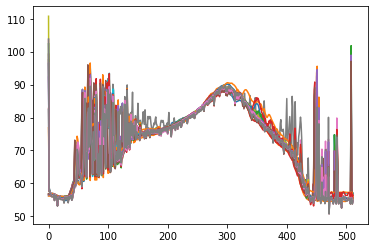

In [39]:
for si in range(len(sis)):
    plt.plot(10*np.log10(np.abs(xst[:,si,si])))

In [29]:
def LoadFiles(fpath):
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files))
    return
    Data=[]
    Bands=[]
    for f in files:
        ext=f.split('.')[-1]
        if ext!='h5': continue;
        s=f.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        try:
         D=loadXST(join(fpath,f));
         D=np.array(D)
         print("band=",band," time=",ftime," Data size=",D.shape)
         Bands.append(band)
         Data.append(D)
        except:
         print('Can not open',f)
        gc.collect()
    return Bands,Data
